In [23]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import operator

def draw_number_cross_grid(numbers, mask, vsep=None, hsep=None, ax=None, title=None, predicates=None):
    rows, cols = numbers.shape
    
    thick_lw = 5
    thin_lw = 1
    
    if ax is None:
        _, ax = plt.subplots(figsize=(cols, rows))
    
    ax.set_xlim(0-0.1, cols+0.1)
    ax.set_ylim(0-0.1, rows+0.1)
    ax.set_aspect('equal')
    ax.axis('off')
    if title:
        ax.set_title(title, fontsize=22)

    for r,c in itertools.product(range(rows), range(cols)):
        # Background colors
        if mask[r,c] == 1:
            facecolor = 'black'
        elif mask[r,c] == 2:
            facecolor = 'yellow'
        else:
            facecolor = 'white'

        x, y = c, rows - 1 - r
        rect = patches.Rectangle((x, y), 1, 1, linewidth=thin_lw, edgecolor='black', facecolor=facecolor)
        ax.add_patch(rect)

        # Draw number
        if numbers[r,c] != '':
            color = 'red' if mask[r,c]==4 else 'black'
            ax.text(x + 0.5, y + 0.5, str(numbers[r,c]), ha='center', va='center', fontsize=26, color=color)
            
    if predicates is not None:
        for r,pred in enumerate(predicates, 0):
            ax.text(-0.5, rows - r - 0.5, pred, ha='right', va='center', fontsize=22, color=color)

    # Thick lines to divide regions
    ax.plot([0, cols], [rows, rows], color='black', linewidth=thick_lw)
    ax.plot([0, cols], [0, 0], color='black', linewidth=thick_lw)
    ax.plot([0, 0], [0, rows], color='black', linewidth=thick_lw)
    ax.plot([cols, cols], [0, rows], color='black', linewidth=thick_lw)
    if vsep is not None:
        for (r,c),_ in filter(operator.itemgetter(1), np.ndenumerate(vsep)):
            ax.plot([c, c+1], [rows - r - 1, rows - r - 1], color='black', linewidth=thick_lw)
    if hsep is not None:
        for (r,c),_ in filter(operator.itemgetter(1), np.ndenumerate(hsep)):
            ax.plot([c+1, c+1], [rows-r-1, rows-r], color='black', linewidth=thick_lw)

    return ax


def state_parse(st):
    lines = st.strip().split('\n')

    vsep = np.array(list(map(lambda l: list(map(lambda x: bool(x.strip()), l.split('+')[1:-1])), lines[0::2])), dtype=np.bool_)[1:-1,:]
    hsep = np.array([[not(hsep[0] == ' ') for hsep in itertools.batched(l, 4)] for l in lines[1::2]], dtype=np.bool_)[:,1:-1]

    numbers = np.array([[x[2] if x[2]!='#' else '' for x in itertools.batched(l, 4) if len(x) > 1] for l in lines[1::2]], dtype=np.str_)

    is_highlighted = np.array([[(x[3] == '@') for x in itertools.batched(l, 4) if len(x) > 1] for l in lines[1::2]], dtype=np.bool_)
    is_altered = np.array([[(x[3] == '\'') for x in itertools.batched(l, 4) if len(x) > 1] for l in lines[1::2]], dtype=np.bool_)
    is_blocked = np.array([[(x[2] == '#') for x in itertools.batched(l, 4) if len(x) > 1] for l in lines[1::2]], dtype=np.bool_)

    state_mask = is_blocked + 2*is_highlighted + 4*is_altered
    
    return numbers, state_mask, vsep, hsep


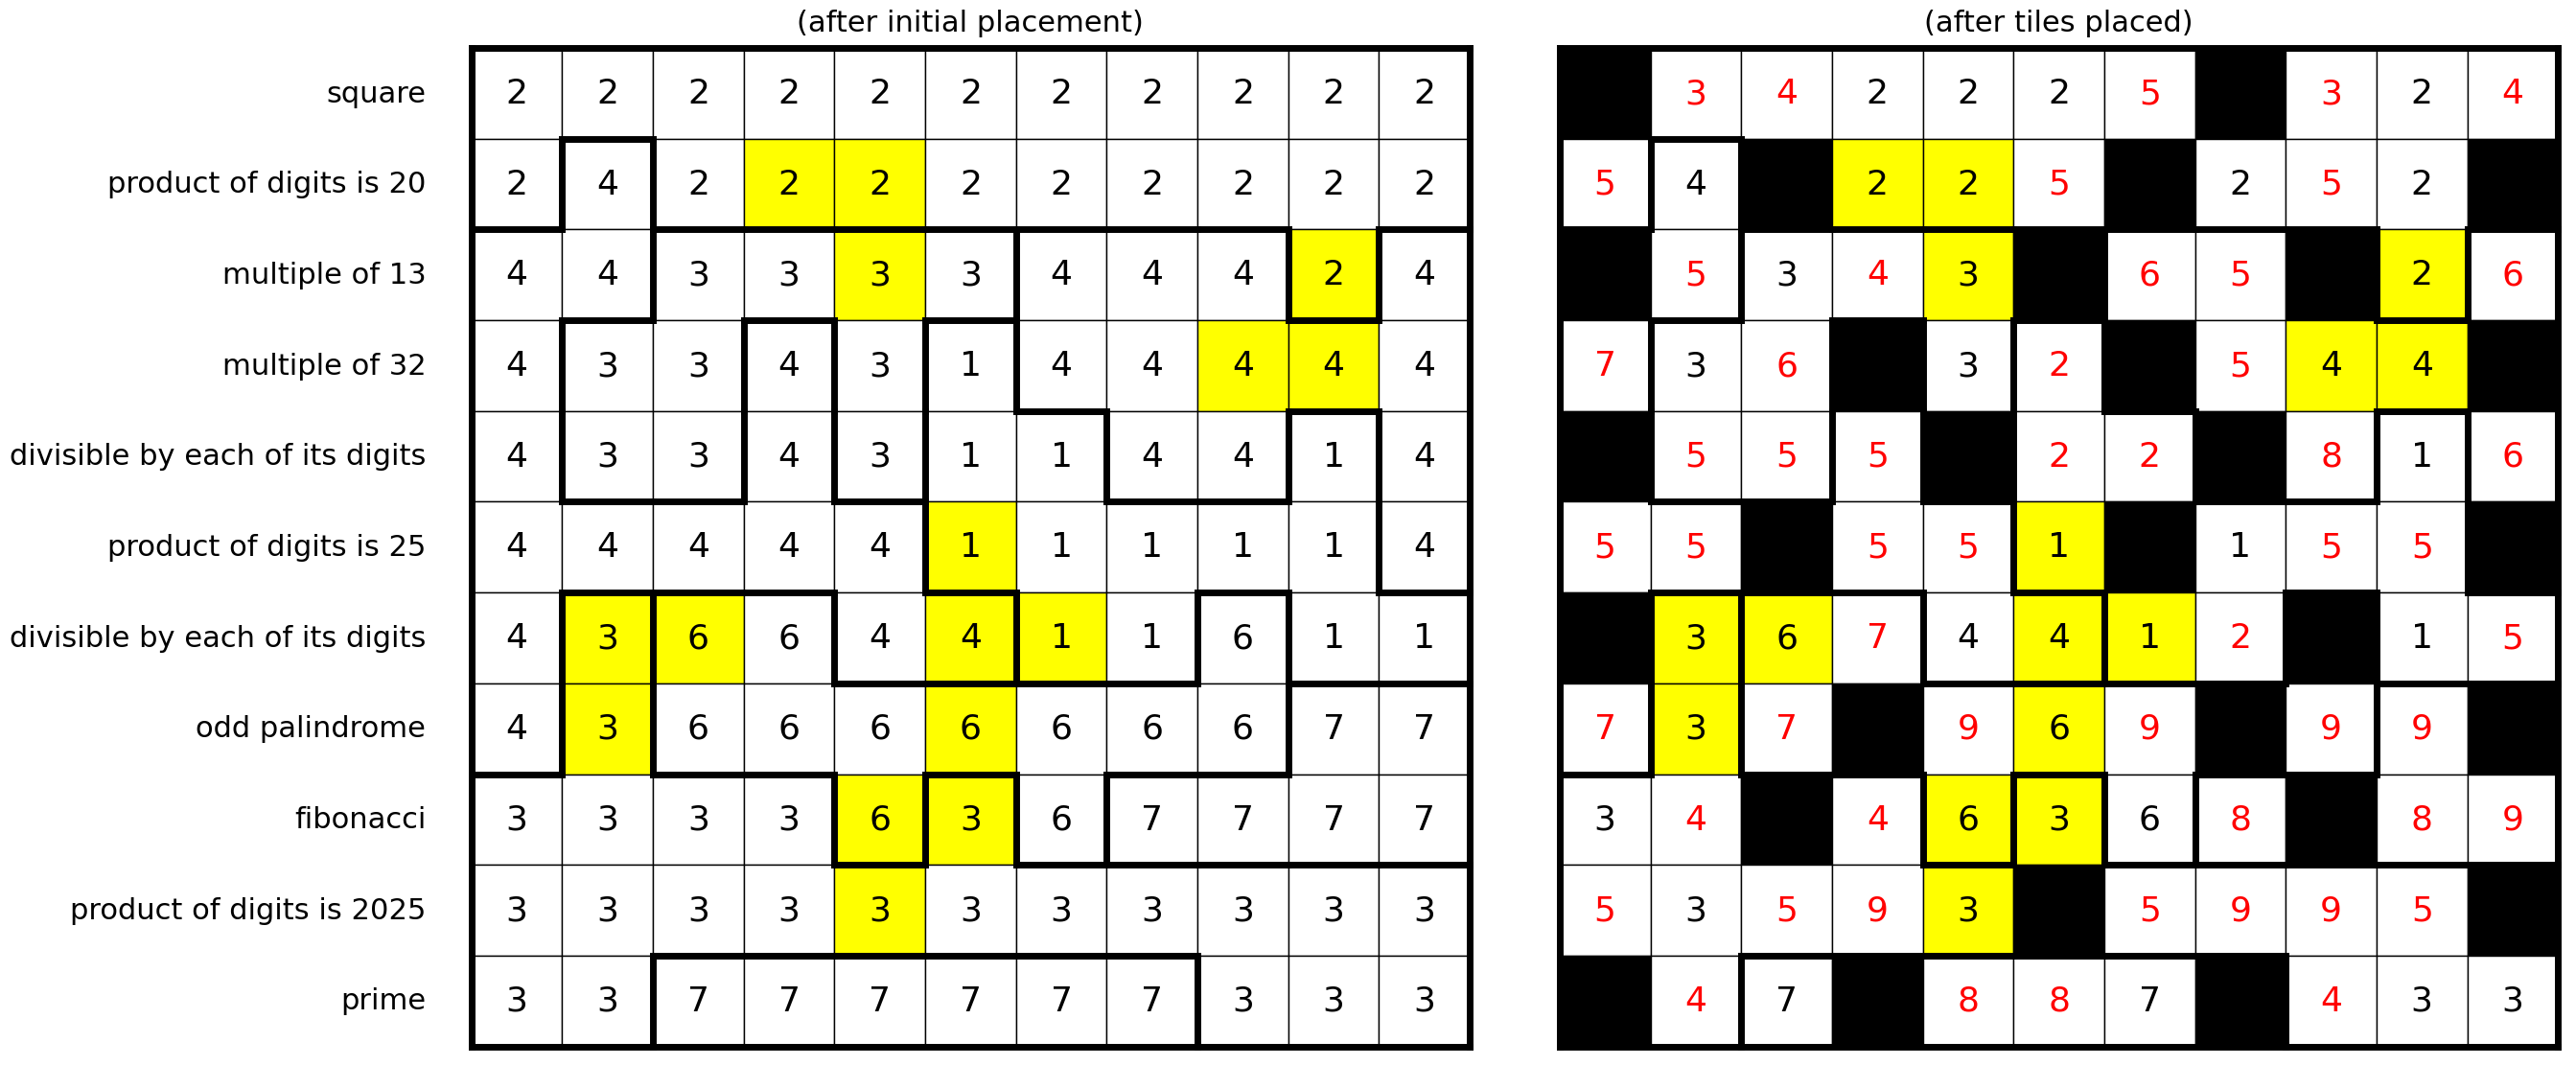

In [24]:
grid_regions = """
+---+---+---+---+---+---+---+---+---+---+---+
| 2   2   2   2   2   2   2   2   2   2   2 |
+   +---+   +   +   +   +   +   +   +   +   +
| 2 | 4 | 2   2@  2@  2   2   2   2   2   2 |
+---+   +---+---+---+---+---+---+---+   +---+
| 4   4 | 3   3   3@  3 | 4   4   4 | 2@| 4 |
+   +---+   +---+   +---+   +   +   +---+   +
| 4 | 3   3 | 4 | 3 | 1 | 4   4   4@  4@  4 |
+   +   +   +   +   +   +---+   +   +---+   +
| 4 | 3   3 | 4 | 3 | 1   1 | 4   4 | 1 | 4 |
+   +---+---+   +---+   +   +---+---+   +   +
| 4   4   4   4   4 | 1@  1   1   1   1 | 4 |
+   +---+---+---+   +---+   +   +---+   +---+
| 4 | 3@| 6@  6 | 4   4@| 1@  1 | 6 | 1   1 |
+   +   +   +   +---+---+---+---+   +---+---+
| 4 | 3@| 6   6   6   6@  6   6   6 | 7   7 |
+---+   +---+---+   +---+   +---+---+   +   +
| 3   3   3   3 | 6@| 3@| 6 | 7   7   7   7 |
+   +   +   +   +---+   +---+---+---+---+---+
| 3   3   3   3   3@  3   3   3   3   3   3 |
+   +   +---+---+---+---+---+---+   +   +   +
| 3   3 | 7   7   7   7   7   7 | 3   3   3 |
+---+---+---+---+---+---+---+---+---+---+---+
"""

grid_solution = """
+---+---+---+---+---+---+---+---+---+---+---+
| #   3'  4'  2   2   2   5'  #   3'  2   4'|
+   +---+   +   +   +   +   +   +   +   +   +
| 5'| 4 | #   2@  2@  5'  #   2   5'  2   # |
+---+   +---+---+---+---+---+---+---+   +---+
| #   5'| 3   4'  3@  # | 6'  5'  # | 2@| 6'|
+   +---+   +---+   +---+   +   +   +---+   +
| 7'| 3   6'| # | 3 | 2'| #   5'  4@  4@  # |
+   +   +   +   +   +   +---+   +   +---+   +
| # | 5'  5'| 5'| # | 2'  2'| #   8'| 1 | 6'|
+   +---+---+   +---+   +   +---+---+   +   +
| 5'  5'  #   5'  5'| 1@  #   1   5'  5'| # |
+   +---+---+---+   +---+   +   +---+   +---+
| # | 3@| 6@  7'| 4   4@| 1@  2'| # | 1   5'|
+   +   +   +   +---+---+---+---+   +---+---+
| 7'| 3@| 7'  #   9'  6@  9'  #   9'| 9'  # |
+---+   +---+---+   +---+   +---+---+   +   +
| 3   4'  #   4'| 6@| 3@| 6 | 8'  #   8'  9'|
+   +   +   +   +---+   +---+---+---+---+---+
| 5'  3   5'  9'  3@  #   5'  9'  9'  5'  # |
+   +   +---+---+---+---+---+---+   +   +   +
| #   4'| 7   #   8'  8'  7   # | 4'  3   3 |
+---+---+---+---+---+---+---+---+---+---+---+
"""

reg_num, reg_mask, vsep, hsep = state_parse(grid_regions)
sol_num, sol_mask, _, _ = state_parse(grid_solution)
rows, cols = reg_num.shape

predicates=[
    'square', 
    'product of digits is 20', 
    'multiple of 13', 
    'multiple of 32',
    'divisible by each of its digits',
    'product of digits is 25',
    'divisible by each of its digits',
    'odd palindrome',
    'fibonacci',
    'product of digits is 2025',
    'prime'
]

fig, axs = plt.subplots(1, 2, figsize=(2*cols + 5, rows), constrained_layout=True)
draw_number_cross_grid(reg_num, reg_mask, vsep, hsep, ax=axs[0], title='(after initial placement)', predicates=predicates)
draw_number_cross_grid(sol_num, sol_mask, vsep, hsep, ax=axs[1], title='(after tiles placed)')
fig.savefig('number-cross-5-sol.png', dpi=72*2, bbox_inches='tight')